## 线性回归的二乘法实现及数据可视化分析

房价预测模型  W=a<sub>0</sub>+a<sub>1</sub>x<sub>1</sub>+a<sub>2</sub>x<sub>2</sub>...a<sub>n</sub>x<sub>n</sub>  

W<sub>i</sub> =a<sub>i</sub>x<sub>i</sub>+ε<sub>i</sub>  
p(ε<sub>i</sub>) = 1/sqrt(2πσ) * exp(-ε<sub>i</sub><sup>2</sup>/2σ<sup>2</sup>)  
->ln(L(a)) = ln$\prod_{i=1}^n$(1/sqrt(2πσ) * exp(-ε<sub>i</sub><sup>2</sup>/2σ<sup>2</sup>))  
->         = nln1/sqrt(2πσ) - 1/σ^2 * (1/2)$\sum_1^n$(w<sub>i</sub> - a<sup>T</sup>x<sub>i</sub>)<sup>2</sup>  
->J(a) = (1/2)$\sum_1^n$(y<sub>i</sub>-a<sup>T</sup>x<sub>i</sub>)<sup>2</sup>  
a=(X<sup>T</sup>X)<sup>−1</sup>X<sup>T</sup>y
（最小二乘法）

∂J(a<sub>i</sub>)/∂a<sub>i</sub> = (-1/n)$\sum_1^n$(w<sub>i</sub>-h<sub>a</sub>(x<sub>i</sub>))x<sup>j</sup><sub>i</sub>

a<sub>i</sub> += α(-1/n)$\sum_{k=i}^{i+9}$(w<sub>i</sub>-h<sub>a</sub>(x<sub>i</sub>))x<sup>j</sup><sub>i</sub>
(梯度下降）

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
filepath = 'C:/Users/32673/Desktop/工作室作业/小组/week1/house_data.csv'

df = pd.read_csv(filepath, header=0)
df_test = df.sample(n=10, replace = False) #取出测试数据

def figure(x1, x2, w1, w2):
    """画图康康"""
    fig = plt.figure()
    f = fig.add_subplot(projection='3d')
    f.set_zlabel('w')
    f.set_ylabel('x2')
    f.set_xlabel('x1')
    f.scatter(x1, x2, w1)
    f.scatter(x1, x2, w2, color='r')
    plt.show()

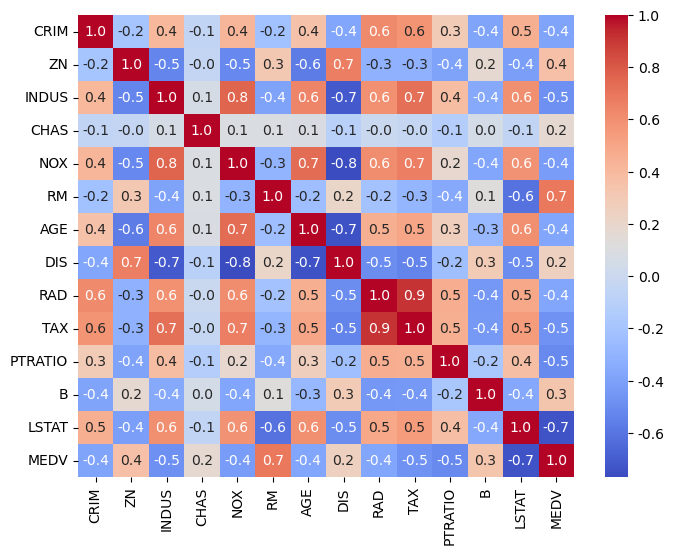

In [68]:
import seaborn as sns
plt.rcParams['axes.unicode_minus'] = False

cor_mat = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor_mat, annot = True, fmt=".1f", cmap='coolwarm')
plt.show()

由图知：取  
x1 = LSTAT  
 x2 = RM  
为相关变量(cor>=0.7)

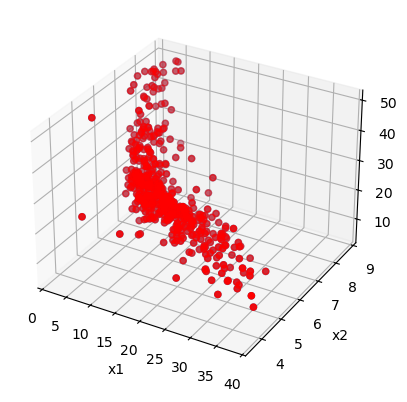

In [71]:
def init_data():
    w = df.MEDV
    x1 = df.LSTAT
    x2 = df.RM
    return w, x1, x2

def init_test_data():
    x1 = df_test.LSTAT
    x2 = df_test.RM
    w = df_test.MEDV
    return w, x1, x2

def init_matrix(x1, x2):
    X = np.array([x1, x2]).T
    X = np.hstack([np.ones((X.shape[0],1)),X])
    return X


w, x1, x2 = init_data()


figure(x1, x2, w, w)

## 最小二乘法实现：

In [74]:
#w=a0 + a1*x1 + a2*x2

W = np.array(w)
X = init_matrix(x1, x2)
n = X.shape[0]



In [76]:
#a=(XTX)−1XTy
def e_cheng(X, W):
    """最小二乘法"""
    a = np.linalg.inv(X.T @ X) @ X.T @ W
    print("a =",a)
    return a

def predict(X, a):
    """预测"""
    return X @ a

a = [-1.35827281 -0.64235833  5.09478798]


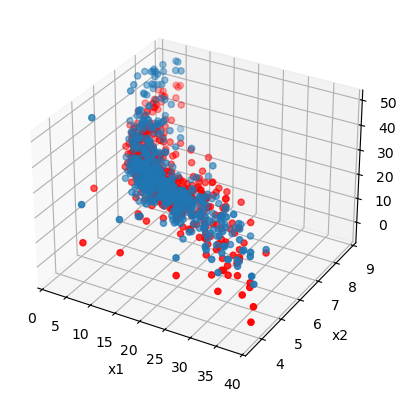

In [78]:

a_t = e_cheng(X, W)
w_pred = predict(X, a_t)

#绘图

figure(x1, x2, w, w_pred)

## TEST

X_test = 
 [[ 1.     5.49   7.241]
 [ 1.    15.76   5.928]
 [ 1.     7.39   6.51 ]
 [ 1.     5.29   8.78 ]
 [ 1.    13.27   6.009]
 [ 1.    12.12   5.012]
 [ 1.    25.79   6.782]
 [ 1.    18.46   6.151]
 [ 1.     7.9    6.266]
 [ 1.     4.97   6.345]]
w_pred = 
 [32.00653973 18.72006301 27.06176888 39.9758901  20.73221309 16.39142155
 16.62815786 18.12183323 25.49103786 27.77563603]


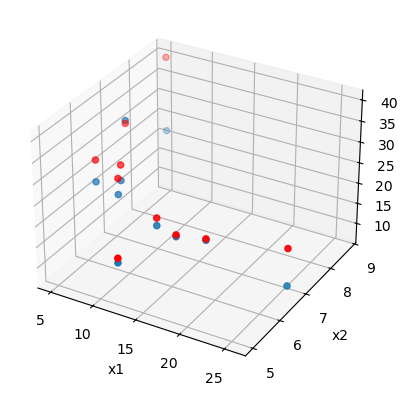

In [40]:
w_test, x1_test, x2_test = init_test_data()
X_test = init_matrix(x1_test, x2_test)
w_pred = predict(X_test, a_t)

print("X_test = \n",X_test)
print("w_pred = \n",w_pred)

figure(x1_test, x2_test, w_test, w_pred)